## Importing the Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

## Importing the dataset

In [2]:
data=pd.read_csv('wine .csv')
data.head() #Retrieving the first 5 records.

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#Ignoring the first column which shows it has 3 clusters

In [4]:
df=data.iloc[:,1:]
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Performing EDA

In [5]:
df.isnull().sum() ##Checking for null values

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
df.isna().sum() ##Checkinng for NA values.

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
df.info() ##Obtaining the datatypes of the features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### From the above analysis we infer that there are no missing values and we are good to implement model.

# Visualizing the data

Alcohol


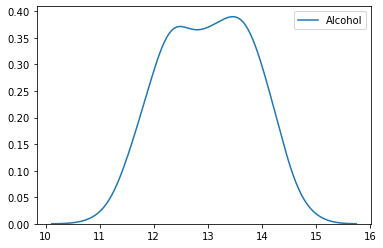

Malic


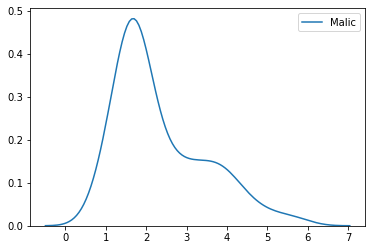

Ash


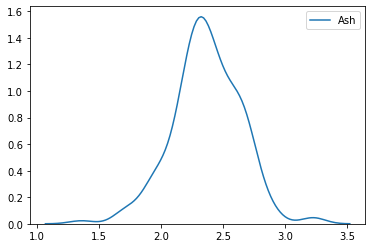

Alcalinity


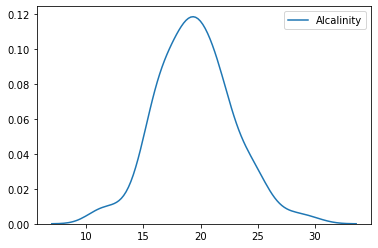

Magnesium


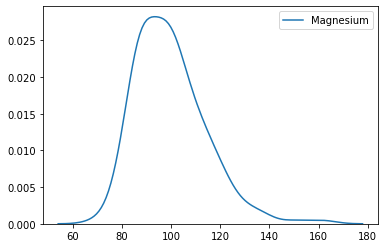

Phenols


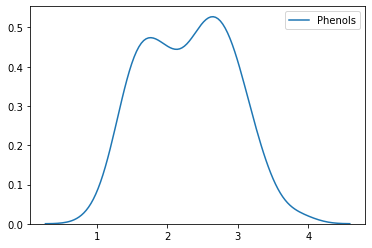

Flavanoids


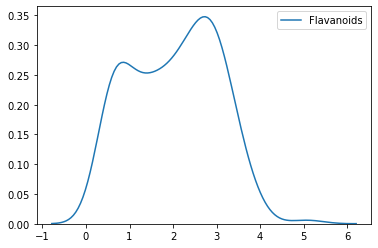

Nonflavanoids


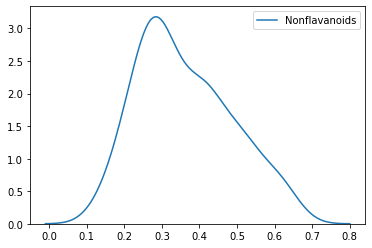

Proanthocyanins


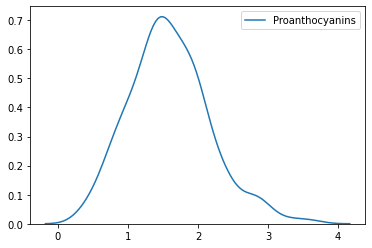

Color


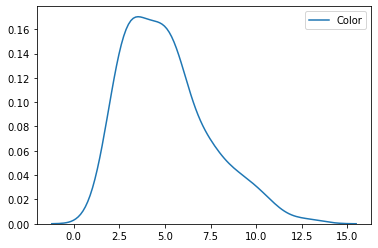

Hue


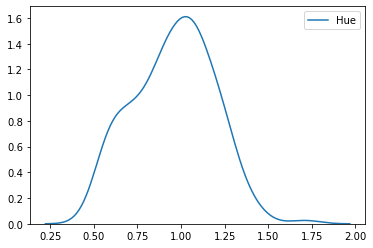

Dilution


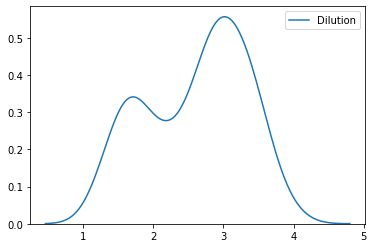

Proline


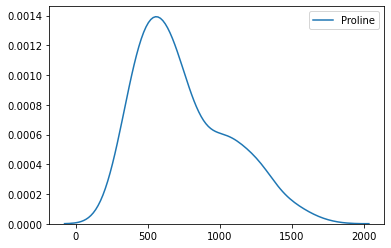

In [45]:
for i in df.columns:
    print(i)
    sns.kdeplot(df[i]) ##Gives the distribution of all the features.
    plt.show()

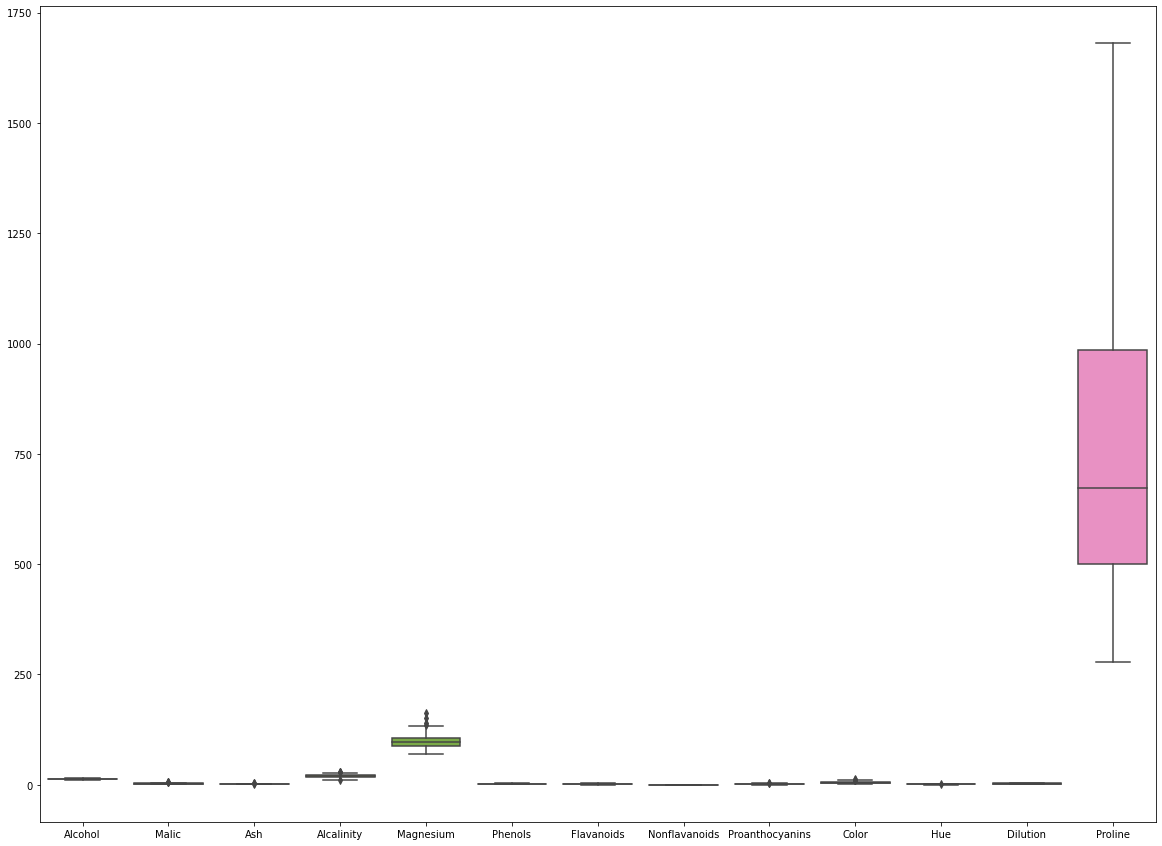

In [48]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df) ##Box plot of all the df features.

# Feature Scaling

### Feature scaling is needed in PCA because it is sensitive to outliers as higher  magnitude features are dominant over the lower magnitude features and may not give good predictions.

In [8]:
from sklearn.preprocessing import StandardScaler #StandardScaler is a class which performs standardization with records centered
##at zero ie mean=0 and std=1.

In [9]:
scaler= StandardScaler() ##Creating an object of StandardScaler class

In [10]:
df1=scaler.fit_transform(df)  ##In fit_tranform, the fit calculates the mean and standard deviation and the tranform converts
##the data with mean 0 and std as 1.

In [11]:
df1

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### We have obtained a standardized data.The next step is to fit PCA. 

# PCA

### This is an unsupervised machine learning algorithm which converts the high dimensional data into a lower dimension to eliminate the curse of dimensionality.

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca=PCA(n_components=3) ##n_components=3 gives 3 principal components.

In [14]:
x_pca=pca.fit_transform(df1) #fit_transform here obtaines the principal components and transforms the dataset by rotating the 
#principal components and thereby transforms the dataset. 

## Let's check if PCA has actually transformed the data into 3 dimensions.

In [15]:
pd.DataFrame(x_pca).shape

(178, 3)

In [16]:
df1.shape

(178, 13)

### As we can see from the above analysis that PCA has successfully converted the data of 13 dimensions into 3 dimensions.

# Analysis of K-Means clustering on PCA and the original data

In [17]:
from sklearn.cluster import KMeans

In [18]:
nclusters=11
WCSS=[] ##empty list to append the WCSS score which is within cluster sum of squares.

In [19]:
for i in range(2,nclusters): #iterating through each cluster value
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=89) ##init=K-means++ solves the initialisation of centroid issue.
    ##random state is initialized for reproducibility.
    kmeans.fit(x_pca) ##Fitting the value to the PCA data.
    WCSS.append(kmeans.inertia_)##Inertia is a method in Kmeans function which gives the WCSS score.So we append the value
    ##of each iteration.
    

Text(0, 0.5, 'WCSS')

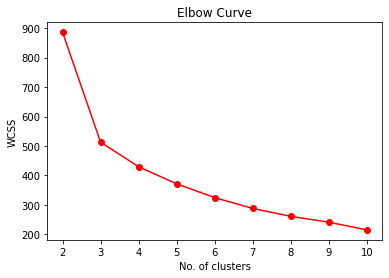

In [20]:

plt.plot(range(2,11),WCSS,'ro-')
plt.title('Elbow Curve')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

### We see that until cluster=4 there is a sharp decrease in WCSS value and after that the value decreases slowly. So value of the cluster is 4.

## Performing the same analysis on the original data.

In [21]:
nclusters=11
WCSS=[]

In [22]:
for i in range(2,nclusters):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=89)
    kmeans.fit(df1)
    WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

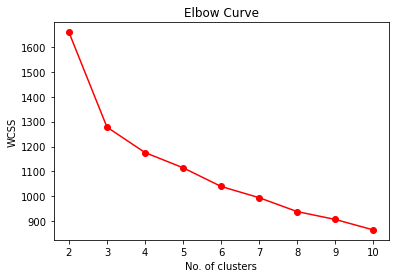

In [23]:

plt.plot(range(2,11),WCSS,'-ro')
plt.title('Elbow Curve')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

# Analysis

### We see that until cluster=4 there is a sharp decrease in WCSS value and after that the value decreases slowly. So value of the cluster is 4. So we can infer from this that the analysis won't get affected by performing PCA. So we might as well use 3 features instead of using 11, which will be good for visualisation purposes

# Analysis of Hierarchical clustering on PCA and the original data

## importing the libraries 

In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

In [26]:
range_n_clusters=11 #Initializing the cluster range.

### Silhuoette score is a cluster validation technique helps to find the optimum number of clusters. A good clustered model must have a positive silhuoette score. Negative silhuoette score means that the clustering is not done well. We find out the silhuoette score for a range of clusters and see which cluster value gives us good silhuoette score. 

# Silhuoette score for the PCA data. 

For n_clusters = 2 The average silhouette_score is : 0.395090372250754
For n_clusters = 3 The average silhouette_score is : 0.44594921980629704
For n_clusters = 4 The average silhouette_score is : 0.38195690348144407
For n_clusters = 5 The average silhouette_score is : 0.3194881617466345
For n_clusters = 6 The average silhouette_score is : 0.31993269879897357
For n_clusters = 7 The average silhouette_score is : 0.28902247635752887
For n_clusters = 8 The average silhouette_score is : 0.2671234478397108
For n_clusters = 9 The average silhouette_score is : 0.2748937706836064
For n_clusters = 10 The average silhouette_score is : 0.2812809411068861


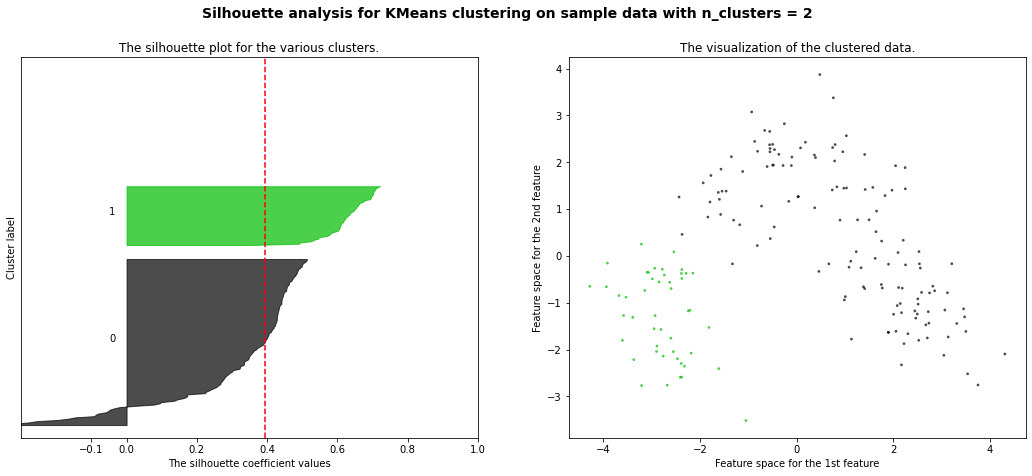

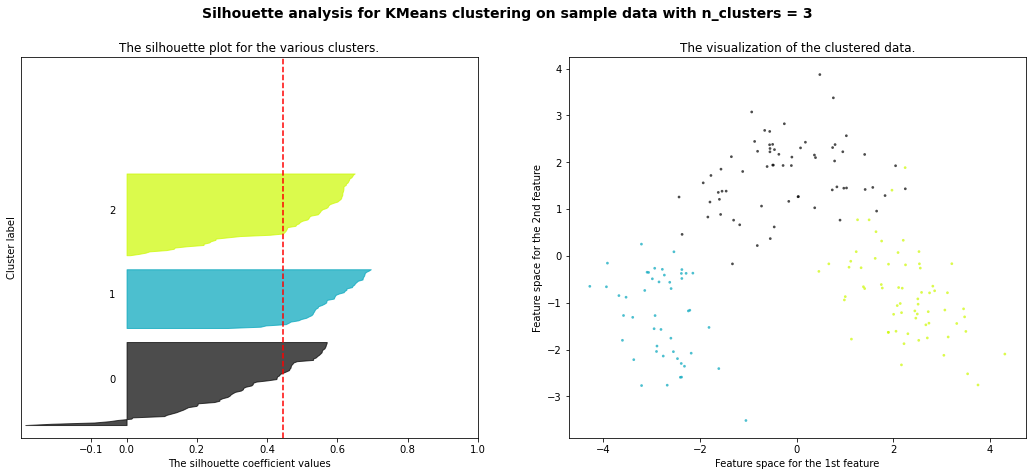

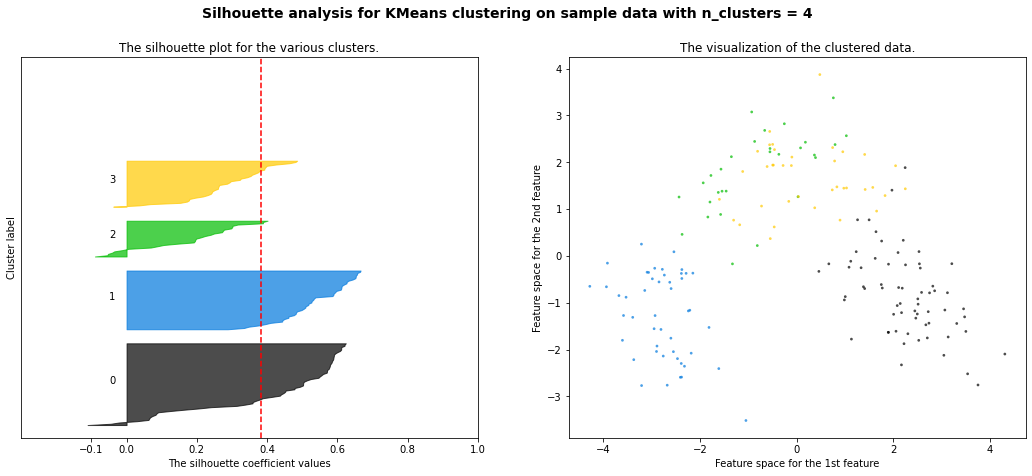

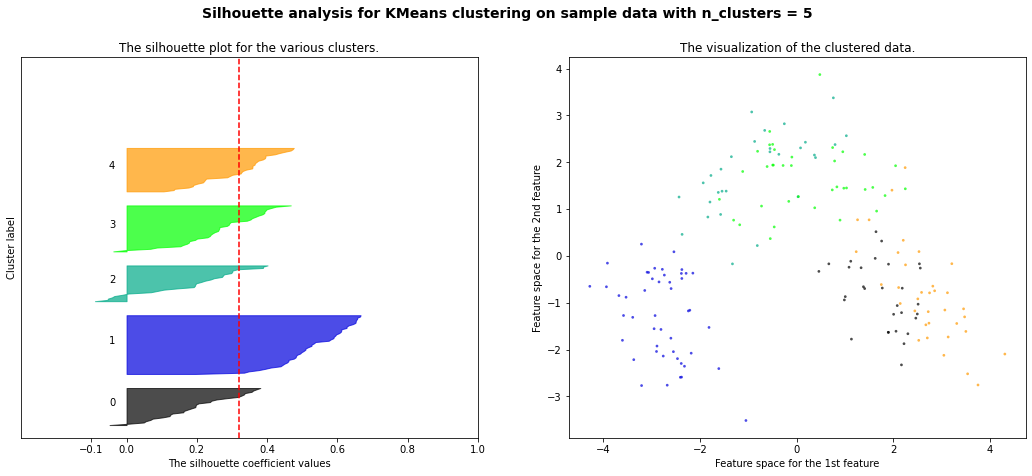

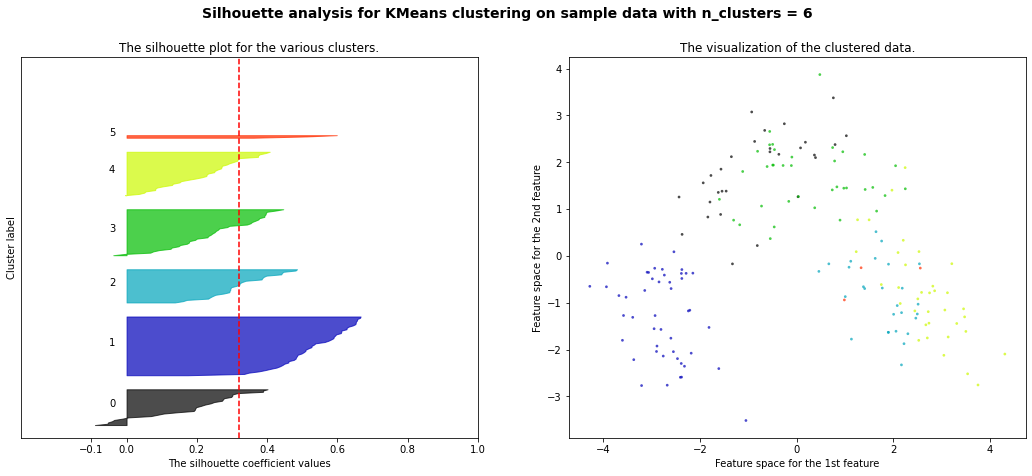

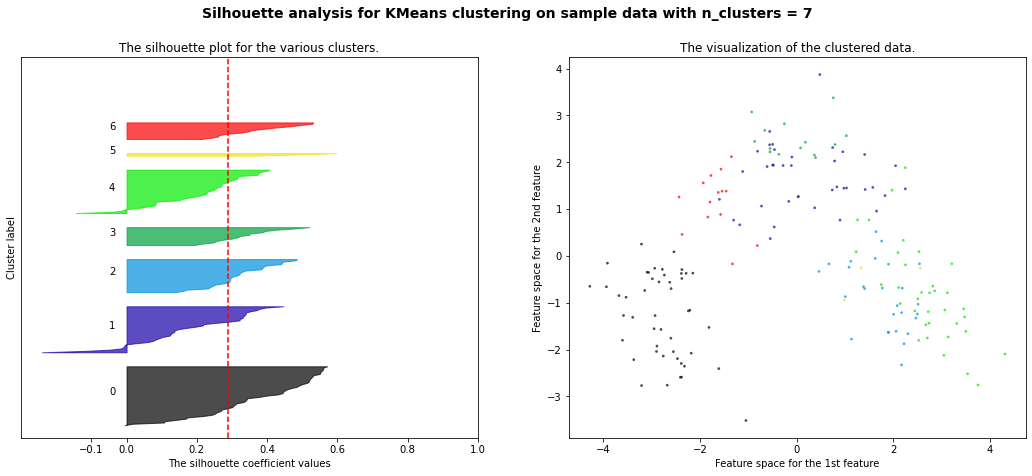

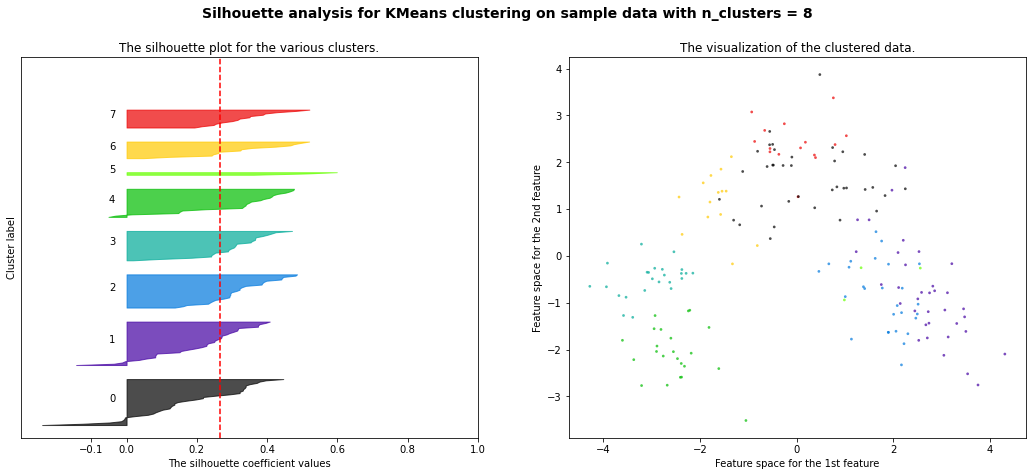

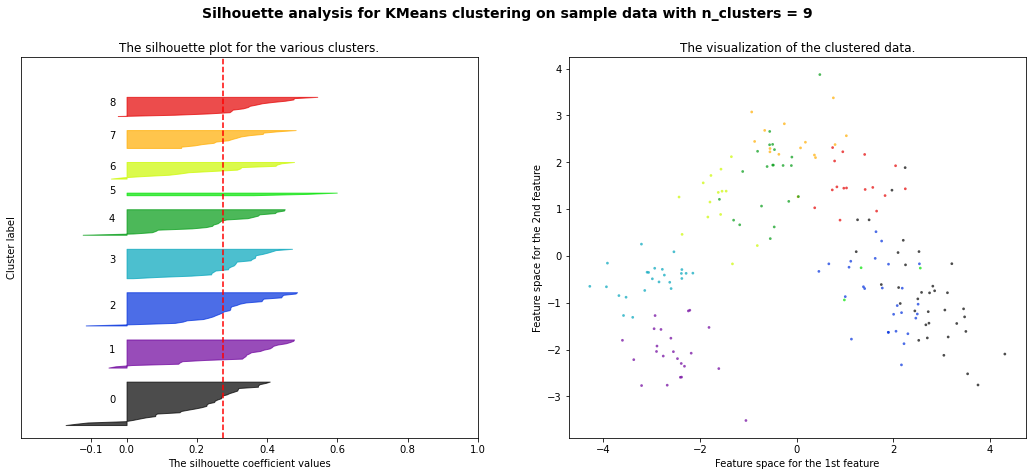

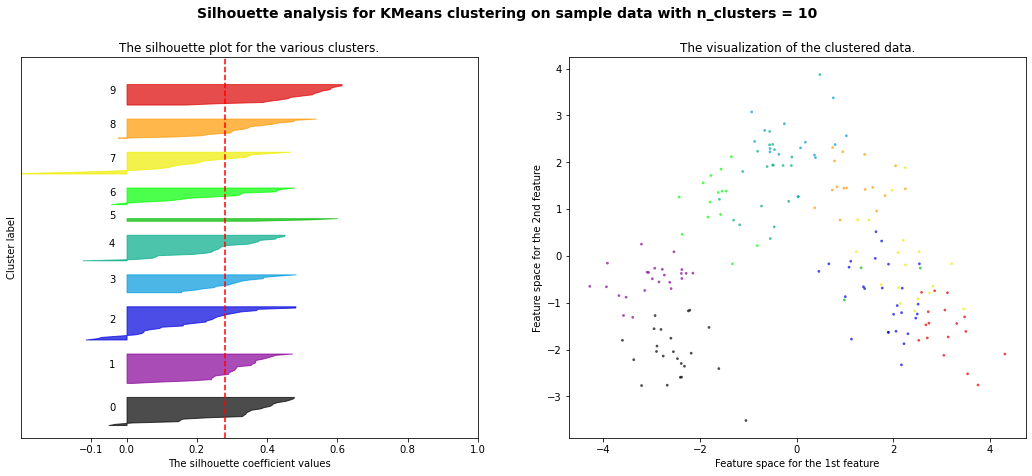

In [40]:
for n_clusters in range(2,range_n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.3, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_pca) + (range_n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters) ##creating an object of heirarchical cluster and fitting it
    # to the PCA data.
    cluster_labels = clusterer.fit_predict(x_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_pca[:, 0], x_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


### From the above graph we see that although for n_cluster=3 the silhuoette score is maximum , if we see the cluster zero has negative silhuoette score and its a negative large value. So let's see n_cluster=4, which has the second highest silhuoette score and when we see the plot it shows that although at some points like in cluster 0,2,3 the silhuoette coefficient values are negative, the value is not that large . So n_clusters=4.

# Silhuoette score for the Original data. 

For n_clusters = 2 The average silhouette_score is : 0.26701317712722306
For n_clusters = 3 The average silhouette_score is : 0.2774439826952265
For n_clusters = 4 The average silhouette_score is : 0.225836659334758
For n_clusters = 5 The average silhouette_score is : 0.18674235566758707
For n_clusters = 6 The average silhouette_score is : 0.17966642854438503
For n_clusters = 7 The average silhouette_score is : 0.18685342560226942
For n_clusters = 8 The average silhouette_score is : 0.18834697102837822
For n_clusters = 9 The average silhouette_score is : 0.1917169293227209
For n_clusters = 10 The average silhouette_score is : 0.19856750165505588


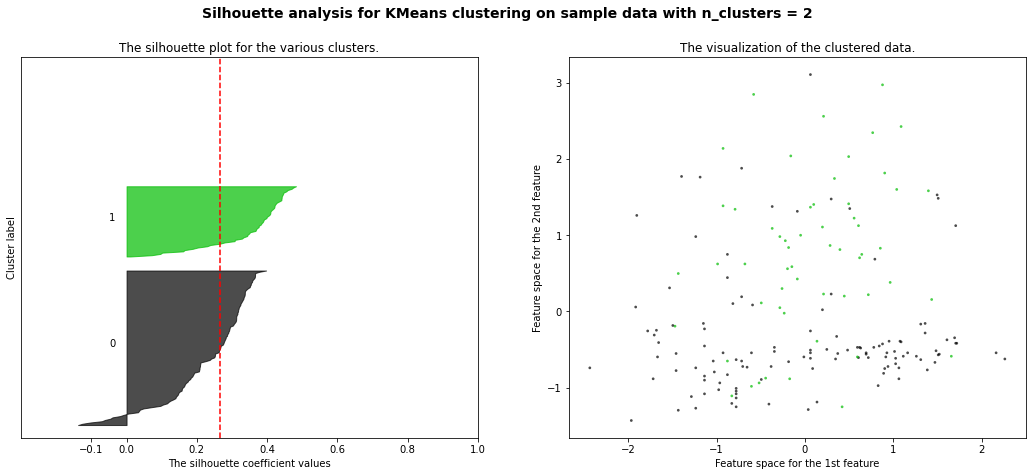

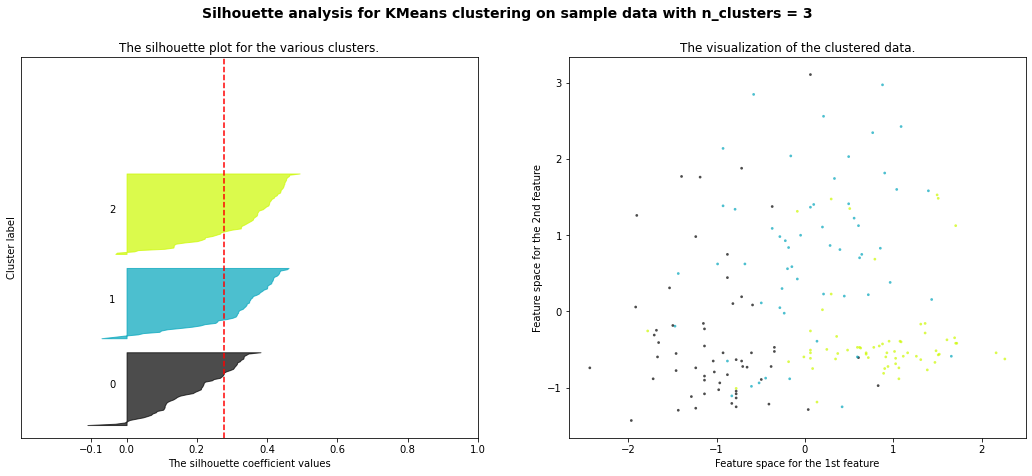

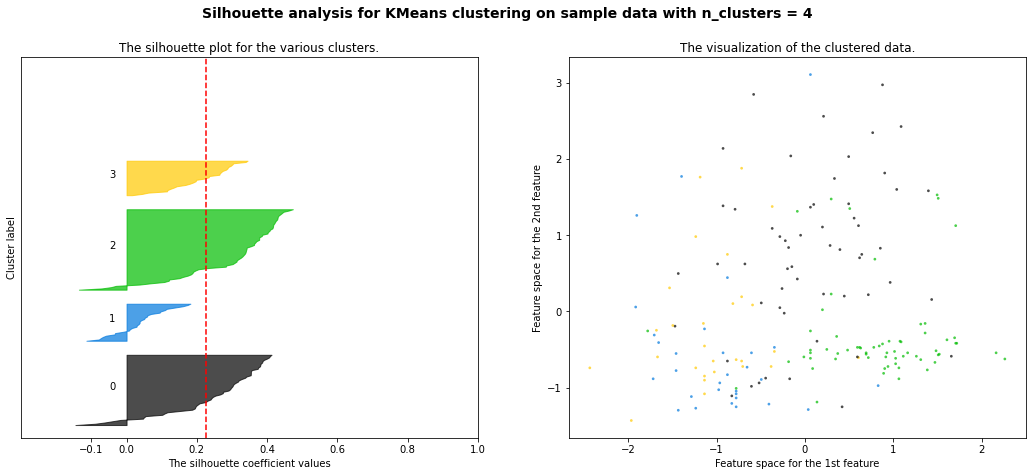

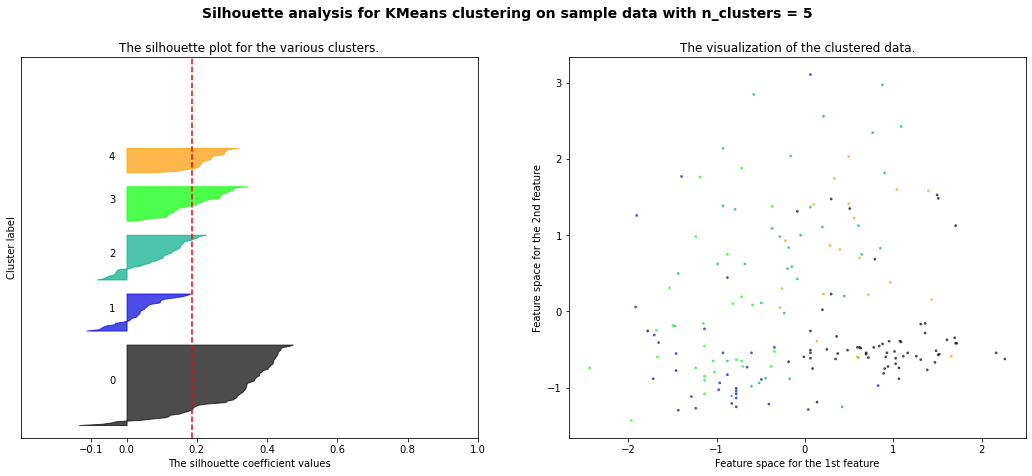

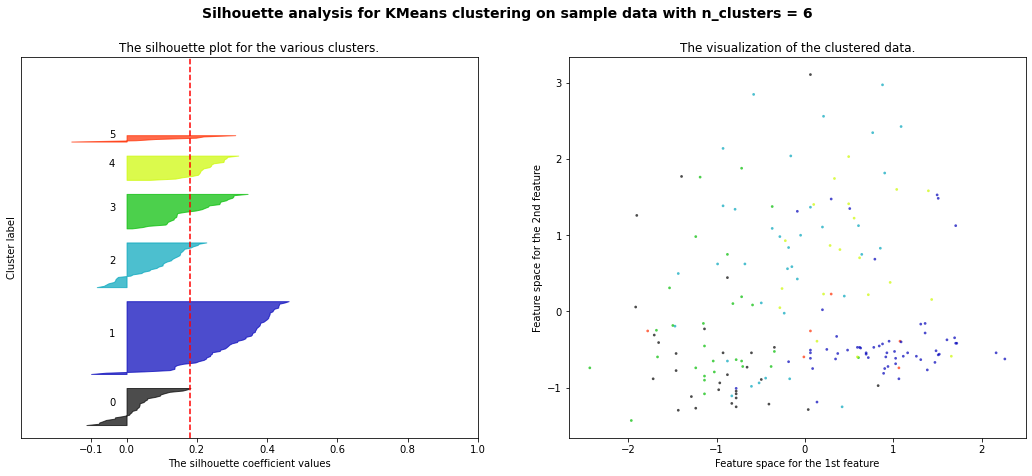

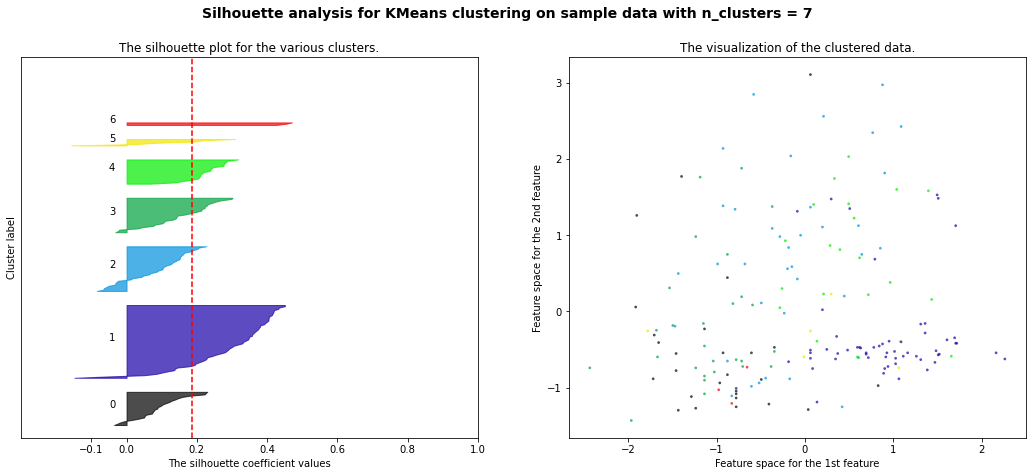

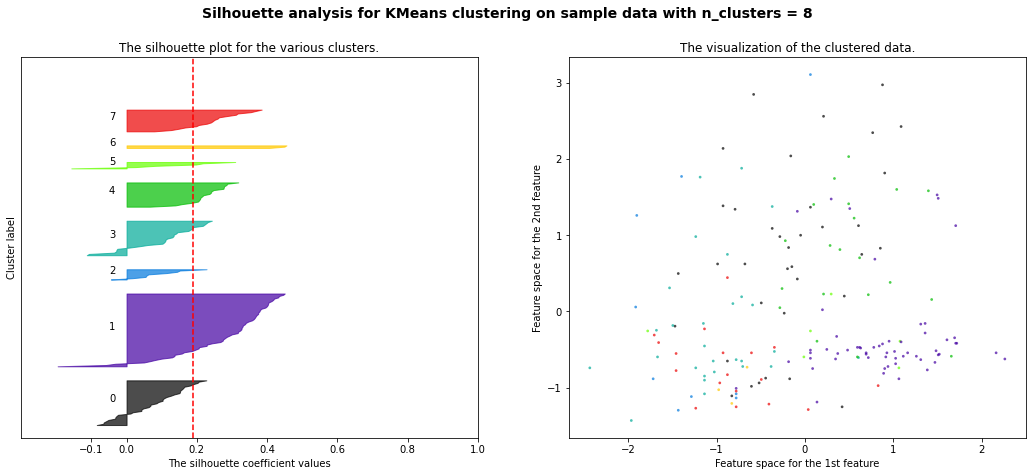

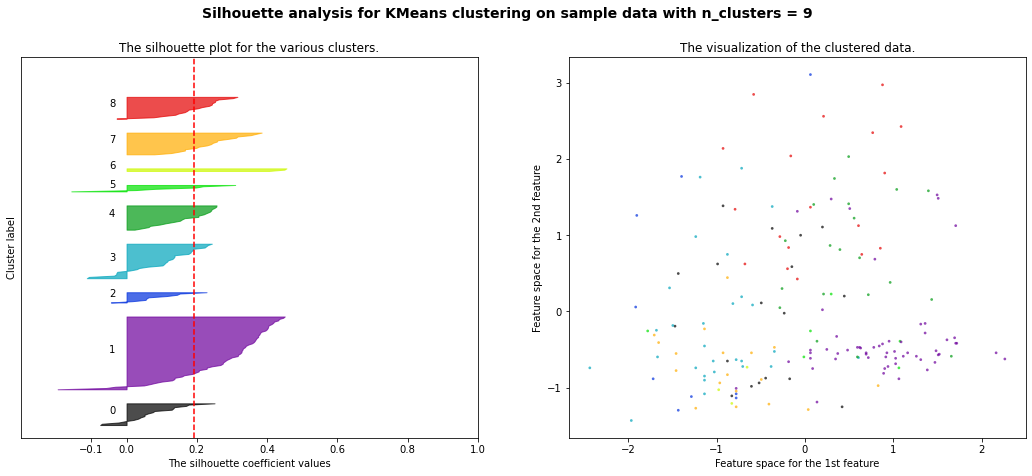

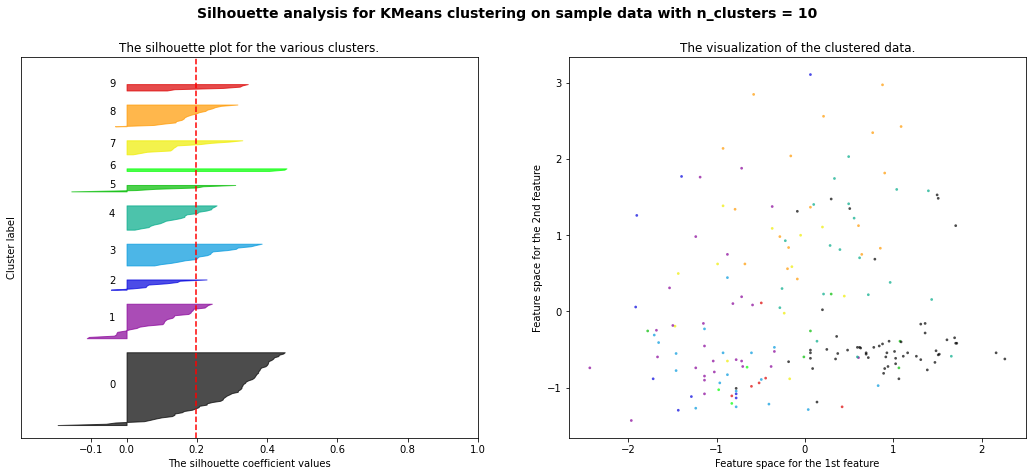

In [41]:
for n_clusters in range(2,range_n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df1) + (range_n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df1[:, 0], df1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


### From the above graph we the silhuoette score for n_cluster=3 is maximum and although the silhuoette sample score have gone negative, the value is not that large. So n_cluster=3. 

# Analysis

### So from the above analysis of we infer that after applying PCA the silhuoette scores seems to be better than the silhuoette scores of the original data which proves that PCA is overall a better algorithm in reducing the dimensions and giving good predictions.